In [3]:
import segyio as segy
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi 
from shutil import copyfile
from skimage import exposure

## Cargar cubos de similaridad y de amplitud

In [1]:
filename = "datos_sismicos/F3_Similarity_FEF_subvolume_IL230-430_XL475-675_T1600-1800.sgy"

In [4]:
similarity = 1-segy.tools.cube(filename)

In [5]:
filename_2 = "datos_sismicos/F3_Dip_steered_median_subvolume_IL230-430_XL475-675_T1600-1800.sgy"

In [10]:
seismic = segy.tools.cube(filename_2)

In [6]:
print("El cubo de similaridad es de tipo: ", type(similarity))

El cubo de similaridad es de tipo:  <class 'numpy.ndarray'>


In [11]:
print("El cubo de sísmica es de tipo: ", type(seismic))

El cubo de sísmica es de tipo:  <class 'numpy.ndarray'>


### Plotear slices

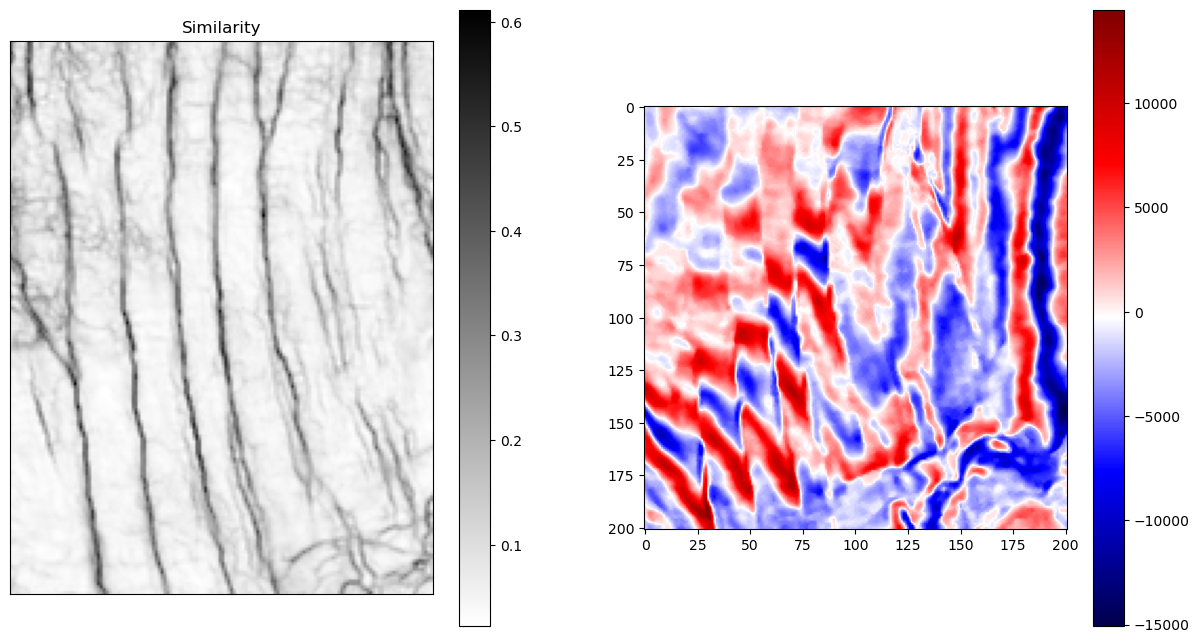

In [13]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(121)
sim = ax.imshow(similarity[:,:, 15], cmap="gray_r")
fig.colorbar(sim, ax=ax)
ax.set_title("Similarity")
ax.set_xticks([])
ax.set_yticks([])
ax.invert_xaxis()

ax1 = fig.add_subplot(122)
amp = ax1.imshow(seismic[:,:, 15], cmap="seismic")
fig.colorbar(amp, ax=ax1)
ax.set_xticks([])
ax.set_yticks([])
ax.invert_xaxis()

In [14]:
np.shape(seismic) == np.shape(similarity)

False

In [15]:
print("Relación Iline/Xline Amplitud: " + str(np.shape(seismic)[0]) + " / " + str(np.shape(seismic)[1]))

Relación Iline/Xline Amplitud: 201 / 201


In [16]:
print("Relación Iline/Xline Similaridad: " + str(np.shape(similarity)[0]) + " / " + str(np.shape(similarity)[1]))

Relación Iline/Xline Similaridad: 191 / 146


## Revisar a profundidad nuestros cubos sísmicos

Ver información de los **inline** y los **crossline** (IL, XL)

In [18]:
with segy.open(filename_2, "r") as segyfile:
    print("Rango de amplitud del inline: " + str(np.amin(segyfile.ilines)) + " - " + str(np.amax(segyfile.ilines)))
    print("Rango de amplitud del xline: " + str(np.amin(segyfile.xlines)) + " - " + str(np.amax(segyfile.xlines)))

Rango de amplitud del inline: 230 - 430
Rango de amplitud del xline: 475 - 675


In [19]:
with segy.open(filename, "r") as segyfile:
    print("Rango de similaridad del inline: " + str(np.amin(segyfile.ilines)) + " - " + str(np.amax(segyfile.ilines)))
    print("Rango de similaridad del xline: " + str(np.amin(segyfile.xlines)) + " - " + str(np.amax(segyfile.xlines)))

Rango de similaridad del inline: 230 - 420
Rango de similaridad del xline: 475 - 620


## Cortar cubo sísmico

In [20]:
seismic = seismic[0:-10, 0:-55,:]

In [21]:
np.shape(seismic) == np.shape(similarity)

True

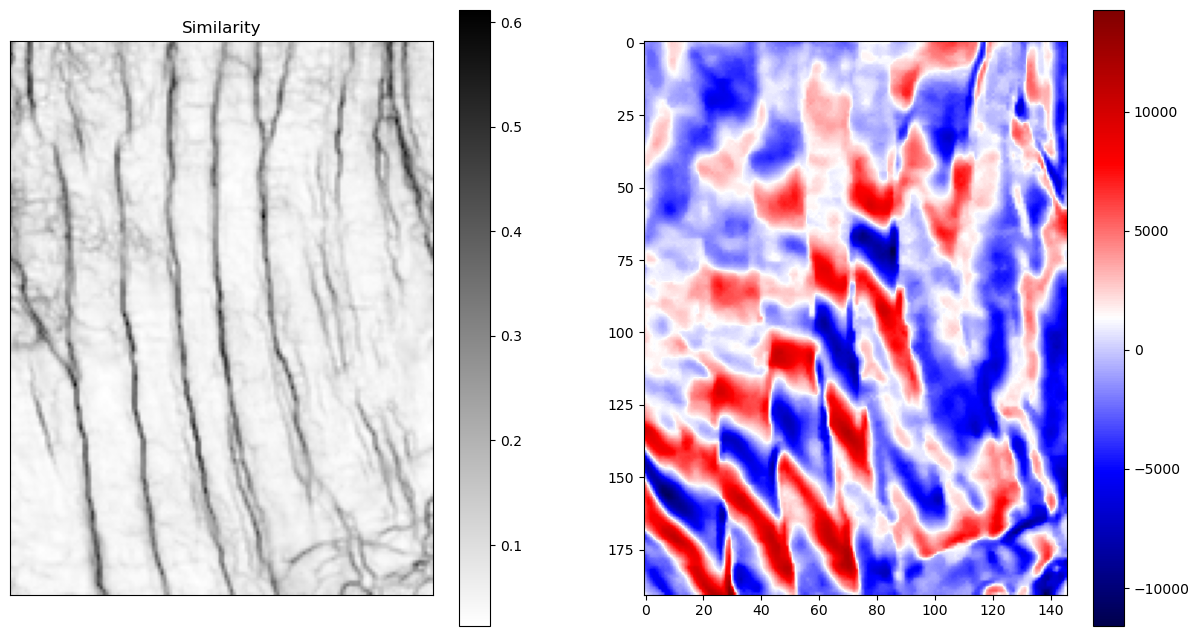

In [22]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(121)
sim = ax.imshow(similarity[:,:, 15], cmap="gray_r")
fig.colorbar(sim, ax=ax)
ax.set_title("Similarity")
ax.set_xticks([])
ax.set_yticks([])
ax.invert_xaxis()

ax1 = fig.add_subplot(122)
amp = ax1.imshow(seismic[:,:, 15], cmap="seismic")
fig.colorbar(amp, ax=ax1)
ax.set_xticks([])
ax.set_yticks([])
ax.invert_xaxis()

## Análisis de datos básico:

In [23]:
similarity = np.power(similarity, 2)

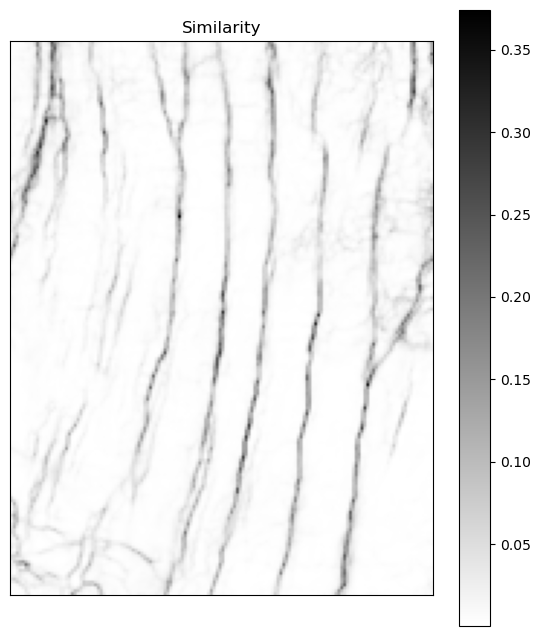

In [24]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(121)
sim = ax.imshow(similarity[:,:, 15], cmap="gray_r")
fig.colorbar(sim, ax=ax)
ax.set_title("Similarity")
ax.set_xticks([])
ax.set_yticks([])
ax.invert_xaxis()

In [26]:
hi_sim = exposure.histogram(similarity)

(0.0, 0.2)

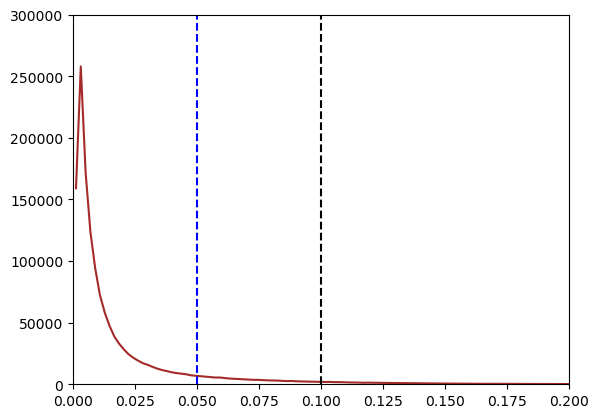

In [31]:
plt.plot(hi_sim[1], hi_sim[0], "brown")
plt.ylim(0, 300000)
plt.axvline(0.1, color="black", linestyle="--")
plt.axvline(0.05, color="blue", linestyle="--")
plt.xlim(0, 0.2)

In [32]:
binary = np.zeros(similarity.shape, dtype=np.uint8)
binary[similarity > 0.05] = 1 

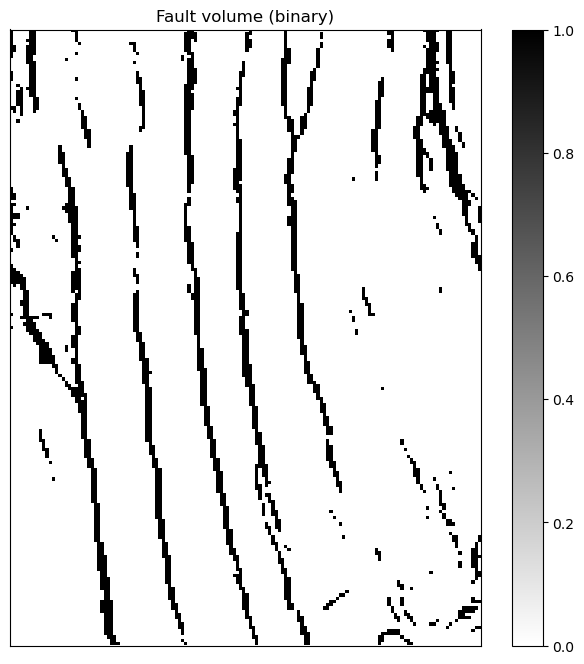

In [34]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(binary[:,:, 15], cmap="gray_r")
plt.title("Fault volume (binary)")
plt.colorbar()

In [35]:
label_objects, npixels = ndi.label(binary)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 10
mask_sizes[0] = 0
cleaned = mask_sizes[label_objects]*1

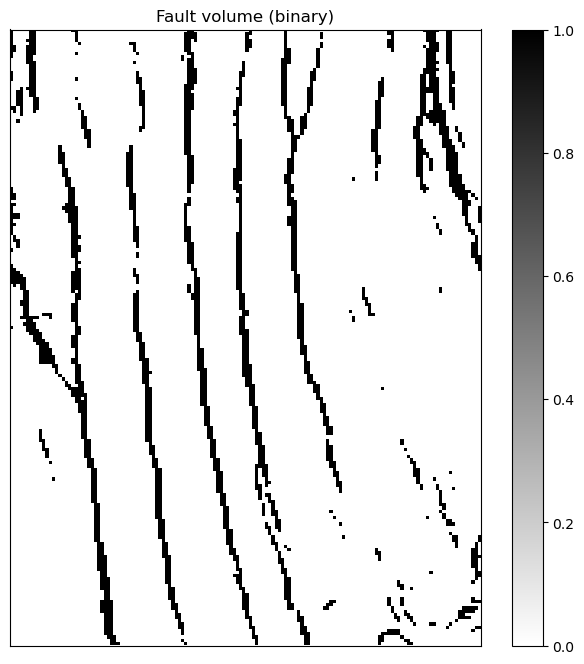

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(cleaned[:,:, 15], cmap="gray_r")
plt.title("Fault volume (binary)")
plt.colorbar()

In [37]:
masked = np.zeros((np.shape(cleaned)))
masked[cleaned==0] = np.nan

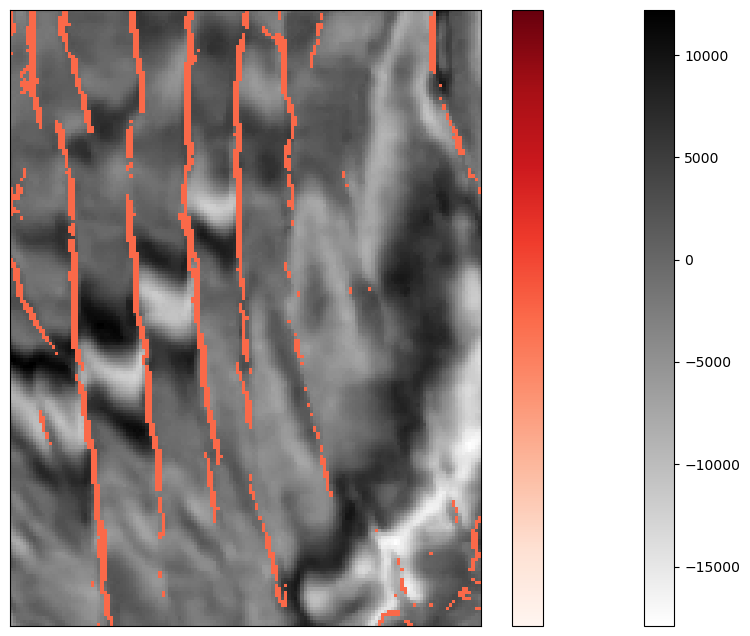

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(seismic[:,:, 8], cmap="gray_r")
plt.colorbar()

plt.imshow(masked[:,:, 8], cmap="Reds")
cb = plt.colorbar()
cb.set_ticks([])

## Exportar volumen de fallas

In [48]:
dim = np.shape(similarity)
idx = np.arange(0, dim[0])
print(np.amin(idx), np.amax(idx))

lns = np.arange(np.amin(segyfile.ilines), np.amax(segyfile.ilines)+1)
print(np.amin(lns), np.amax(lns))

0 190
230 420


In [ ]:
cleaned = cleaned.astype('float32')

In [51]:
input_file =  'datos_sismicos/F3_Similarity_FEF_subvolume_IL230-430_XL475-675_T1600-1800.sgy'
output_file = 'datos_sismicos/F3_Faults.sgy'

copyfile(input_file, output_file)

with segy.open(output_file, "r+") as dst:
    for i, j in zip(lns, idx):
        dst.ilines[i] = cleaned[j, :, :]

IndexError: index 230 is out of bounds for axis 0 with size 191